In [103]:
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm

In [104]:
!tree -L 2

/bin/bash: /home/anwer/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
.
├── COVID-19-Wearables
│   ├── A06L7KF_hr.csv
│   ├── A06L7KF_steps.csv
│   ├── A0822M0_hr.csv
│   ├── A0822M0_steps.csv
│   ├── A0KX894_hr.csv
│   ├── A0KX894_steps.csv
│   ├── A0L9BM2_hr.csv
│   ├── A0L9BM2_steps.csv
│   ├── A0N9NV4_hr.csv
│   ├── A0N9NV4_steps.csv
│   ├── A0NVTRV_hr.csv
│   ├── A0NVTRV_sleep.csv
│   ├── A0NVTRV_steps.csv
│   ├── A0VFT1N_hr.csv
│   ├── A0VFT1N_sleep.csv
│   ├── A0VFT1N_steps.csv
│   ├── A11SQQN_hr.csv
│   ├── A11SQQN_steps.csv
│   ├── A11V1FH_hr.csv
│   ├── A11V1FH_steps.csv
│   ├── A17YCA2_hr.csv
│   ├── A17YCA2_steps.csv
│   ├── A1K5DRI_hr.csv
│   ├── A1K5DRI_sleep.csv
│   ├── A1K5DRI_steps.csv
│   ├── A1ZJ41O_hr.csv
│   ├── A1ZJ41O_sleep.csv
│   ├── A1ZJ41O_steps.csv
│   ├── A2D7K4A_hr.csv
│   ├── A2D7K4A_steps.csv
│   ├── A2P3LTM_hr.csv
│   ├── A2P3LTM_steps.csv
│   ├── A2XFW2N_hr.csv
│   ├── A2XFW2N_steps.csv
│   ├── A35BJNV_hr.csv
│   

# Dataset_1

In [209]:
for i in tqdm(glob.glob(r"COVID-19-Wearables/*_hr.csv")):
    hr_file = i
    
    step_file = i.split("_")[0]+"_steps.csv"
   
    data_hr = pd.read_csv(i)
    data_hr['datetime'] = pd.to_datetime(data_hr['datetime'])
    
    data_hr = data_hr[['datetime','heartrate']]
    data_hr = data_hr.set_index('datetime')
    data_hr_1hr_gap = data_hr.heartrate.resample('24H').mean()
    try:
        data_steps = pd.read_csv(step_file)
    except:
        continue
    data_steps['datetime'] = pd.to_datetime(data_steps['datetime'])
    data_steps = data_steps[['datetime','steps']]
    data_steps = data_steps.set_index('datetime')
    data_steps_1hr_gap = data_steps.steps.resample('24H').mean()
    data_merge=pd.merge(data_hr_1hr_gap,data_steps_1hr_gap,how='inner', left_index=True, right_index=True)
    data_merge.to_csv("merged_data_dataset_1/"+i.split("/")[1].split("_")[0]+".csv")
    

100%|██████████| 120/120 [01:03<00:00,  1.90it/s]


# Dataset_2

In [210]:
# for i in os.listdir("dataset_2/"):
#     print(i)
for i in tqdm(glob.glob("dataset_2/*")):
    for j in glob.glob(i+"/*_HR.csv"):
        try:
            data_hr = pd.read_csv(j)
            data_hr['datetime'] = pd.to_datetime(data_hr['datetime'])
            
            data_hr = data_hr[['datetime','heartrate']]
            data_hr = data_hr.set_index('datetime')
            data_hr_1hr_gap = data_hr.heartrate.resample('24H').mean()
                
            
            step_file = j.split("H")[0]+"ST.csv"
        except:
            continue
        
        
        try:
            try:
                data_steps = pd.read_csv(step_file)
            except:
                continue
            data_steps['datetime'] = pd.to_datetime(data_steps['datetime'])
            data_steps = data_steps[['datetime','steps']]
            data_steps = data_steps.set_index('datetime')
            data_steps_1hr_gap = data_steps.steps.resample('24H').mean()
            data_merge=pd.merge(data_hr_1hr_gap,data_steps_1hr_gap,how='inner', left_index=True, right_index=True)
            data_merge.to_csv("merged_data_dataset_2/"+step_file.split("/")[1]+".csv")
            
        except:
            
            pass

        try:
            data_steps = pd.read_csv(step_file)
            data_steps['datetime'] = pd.to_datetime(data_steps['start_datetime'])
            data_steps = data_steps[['datetime','steps']]
            data_steps = data_steps.set_index('datetime')
            data_steps_1hr_gap = data_steps.steps.resample('24H').mean()
            data_merge=pd.merge(data_hr_1hr_gap,data_steps_1hr_gap,how='inner', left_index=True, right_index=True)
            data_merge.to_csv("merged_data_dataset_2/"+step_file.split("/")[1]+".csv")
            
        except:
            
            continue
    
        
    

100%|██████████| 2122/2122 [16:41<00:00,  2.12it/s]


# Dataset_1 creation

In [190]:
data = pd.read_csv("merged_data_dataset_1/AFPB8J2.csv")
data['steps'] = np.where(data['steps']== 0, 1, data['steps'])
data['hr_step_ratio'] = data['heartrate']/(data['steps'])

In [191]:
data.head()

,datetime,heartrate,steps,hr_step_ratio
0,2026-06-22 00:00:00,71.182364,3.826389,18.603013
1,2026-06-22 12:00:00,89.032760,8.665278,10.274657
2,2026-06-23 00:00:00,69.057061,2.497222,27.653550
3,2026-06-23 12:00:00,77.727771,6.812500,11.409581
4,2026-06-24 00:00:00,68.116627,2.416667,28.186190


In [193]:
def data_mask(data,start_date = '2026-07-01',end_date ='2026-07-30'):

    mask = (data['datetime'] > start_date) & (data['datetime'] <= end_date)
    return data.loc[mask]


In [198]:
start_date = '2026-06-22'
end_date ='2026-07-14'
data_1 = data_mask(data,start_date,end_date)
data_1.head()

,datetime,heartrate,steps,hr_step_ratio
0,2026-06-22 00:00:00,71.182364,3.826389,18.603013
1,2026-06-22 12:00:00,89.032760,8.665278,10.274657
2,2026-06-23 00:00:00,69.057061,2.497222,27.653550
3,2026-06-23 12:00:00,77.727771,6.812500,11.409581
4,2026-06-24 00:00:00,68.116627,2.416667,28.186190


In [204]:
import numpy as np
start_date = '2026-06-22'
symptoms_date = '2026-07-14'
(start_date-symptoms_date)/np.timedelta64(1, 'D')

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2815175577.py, line 2)

<AxesSubplot:>

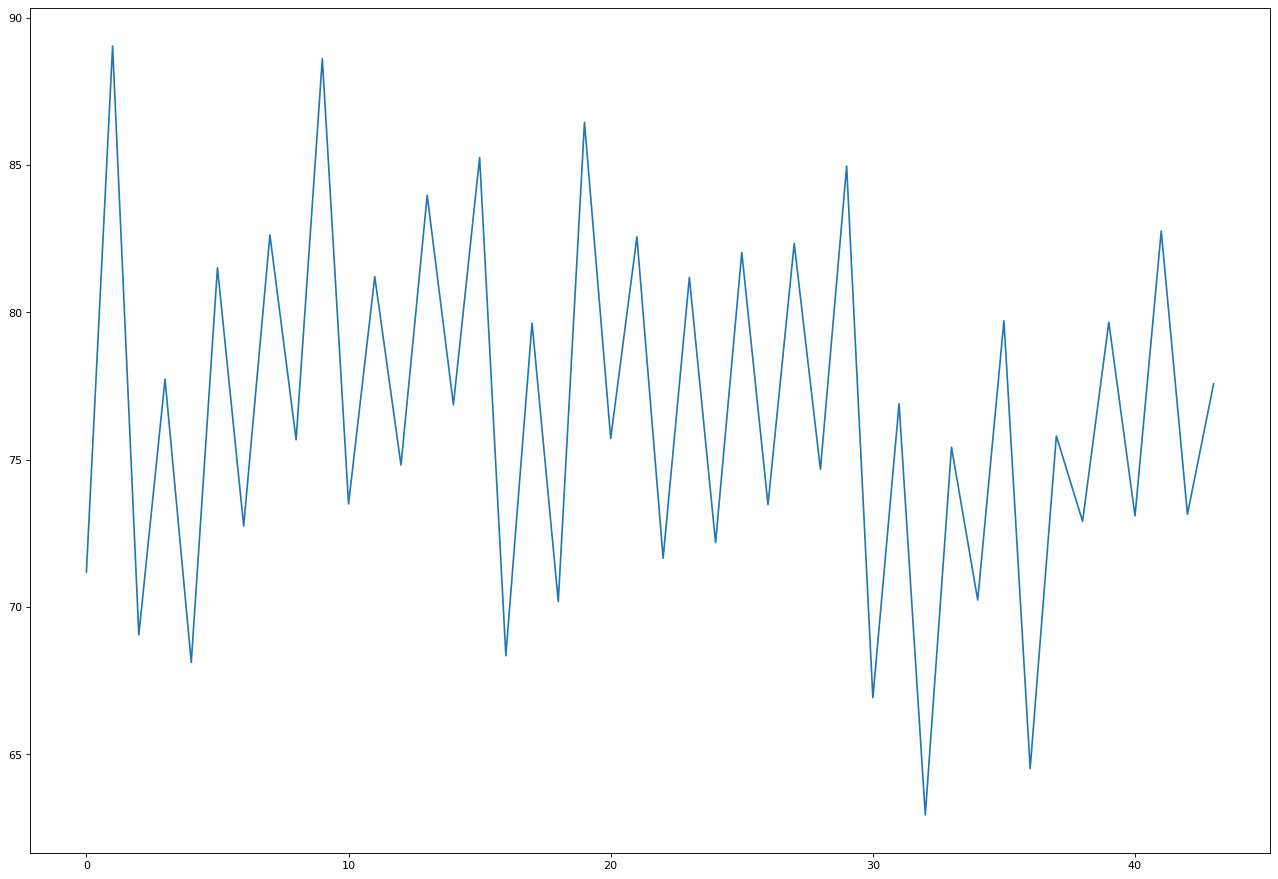

In [208]:
from matplotlib.pyplot import figure

figure(figsize=(20, 14), dpi=80)
data_1.heartrate.plot()

<AxesSubplot:>

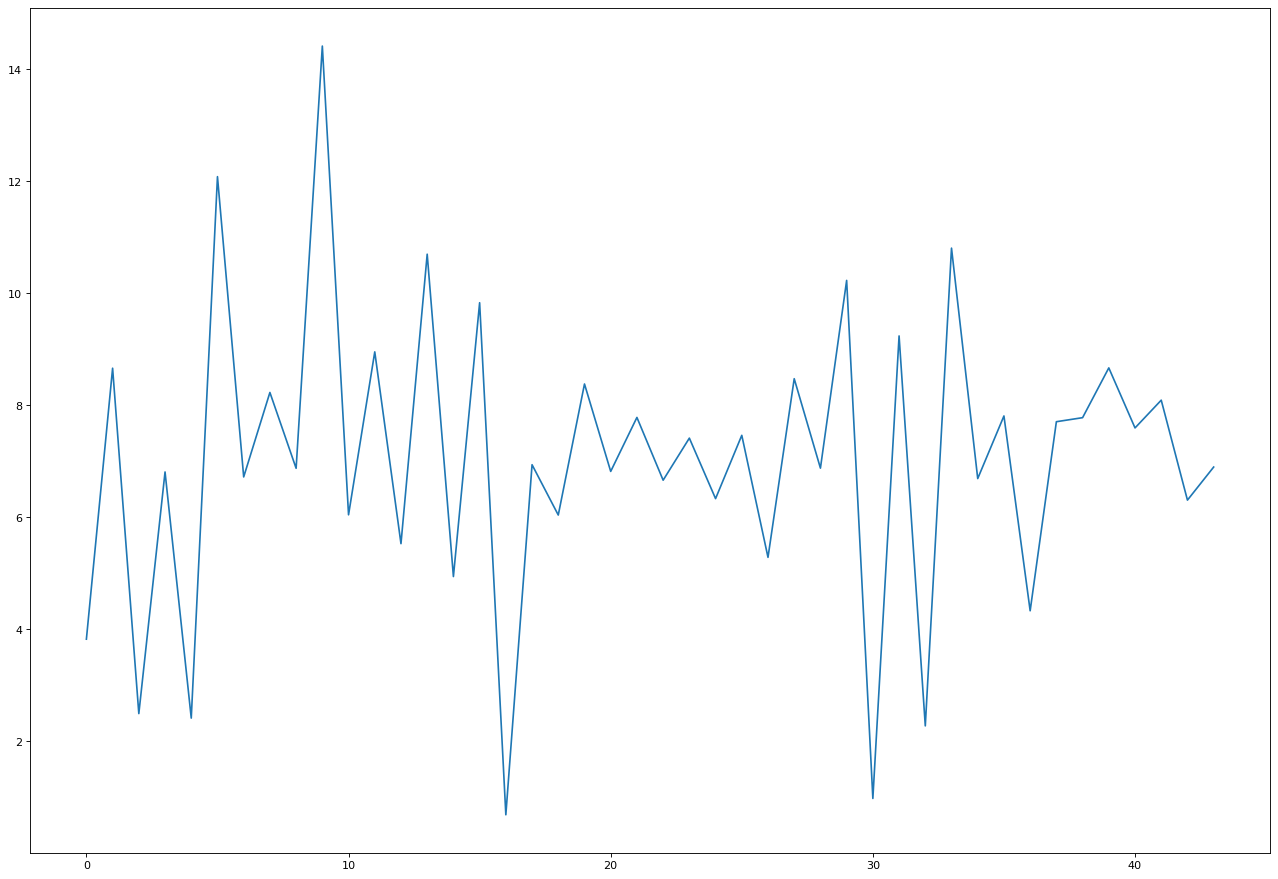

In [206]:
from matplotlib.pyplot import figure

figure(figsize=(20, 14), dpi=80)
data_1.steps.plot()

<AxesSubplot:>

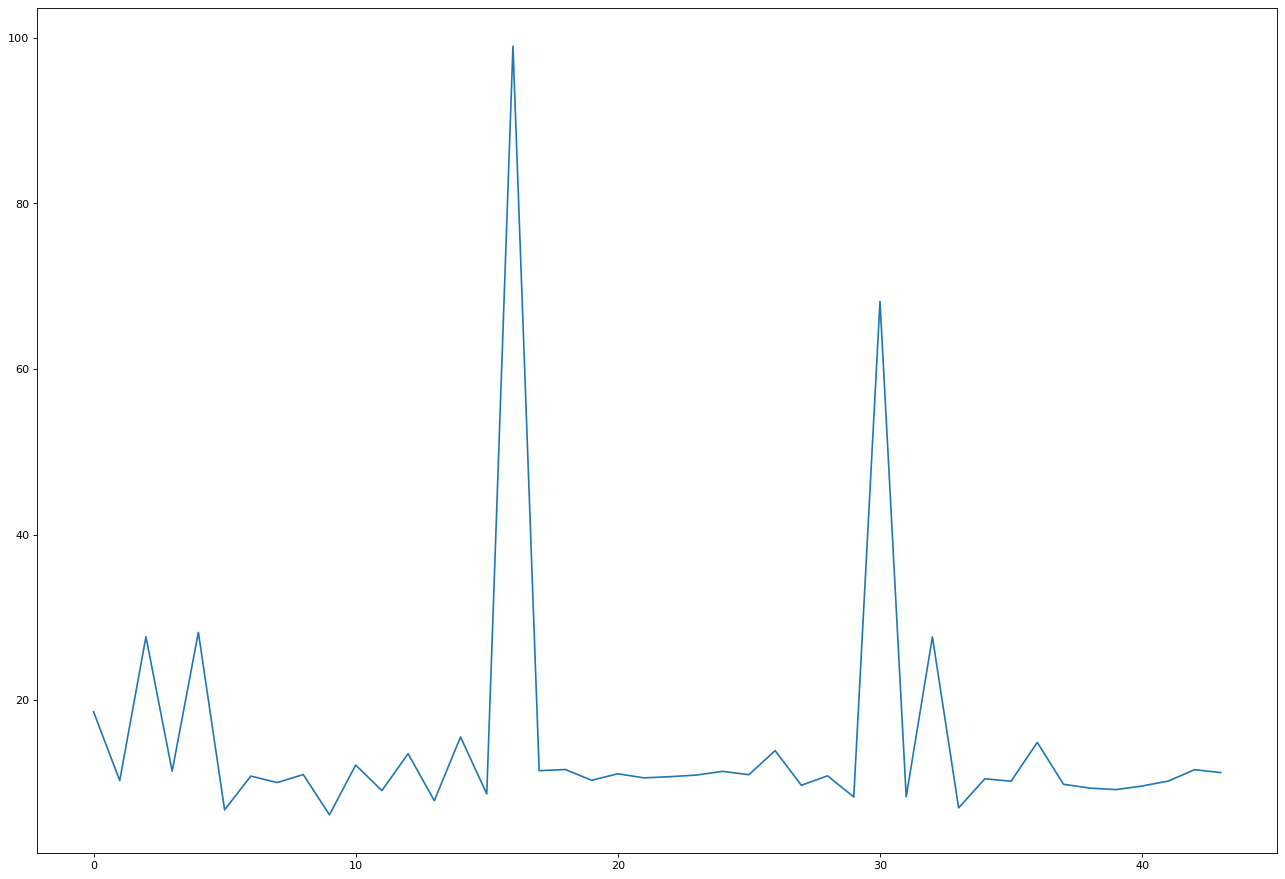

In [207]:
from matplotlib.pyplot import figure

figure(figsize=(20, 14), dpi=80)
data_1.hr_step_ratio.plot()

<AxesSubplot:>

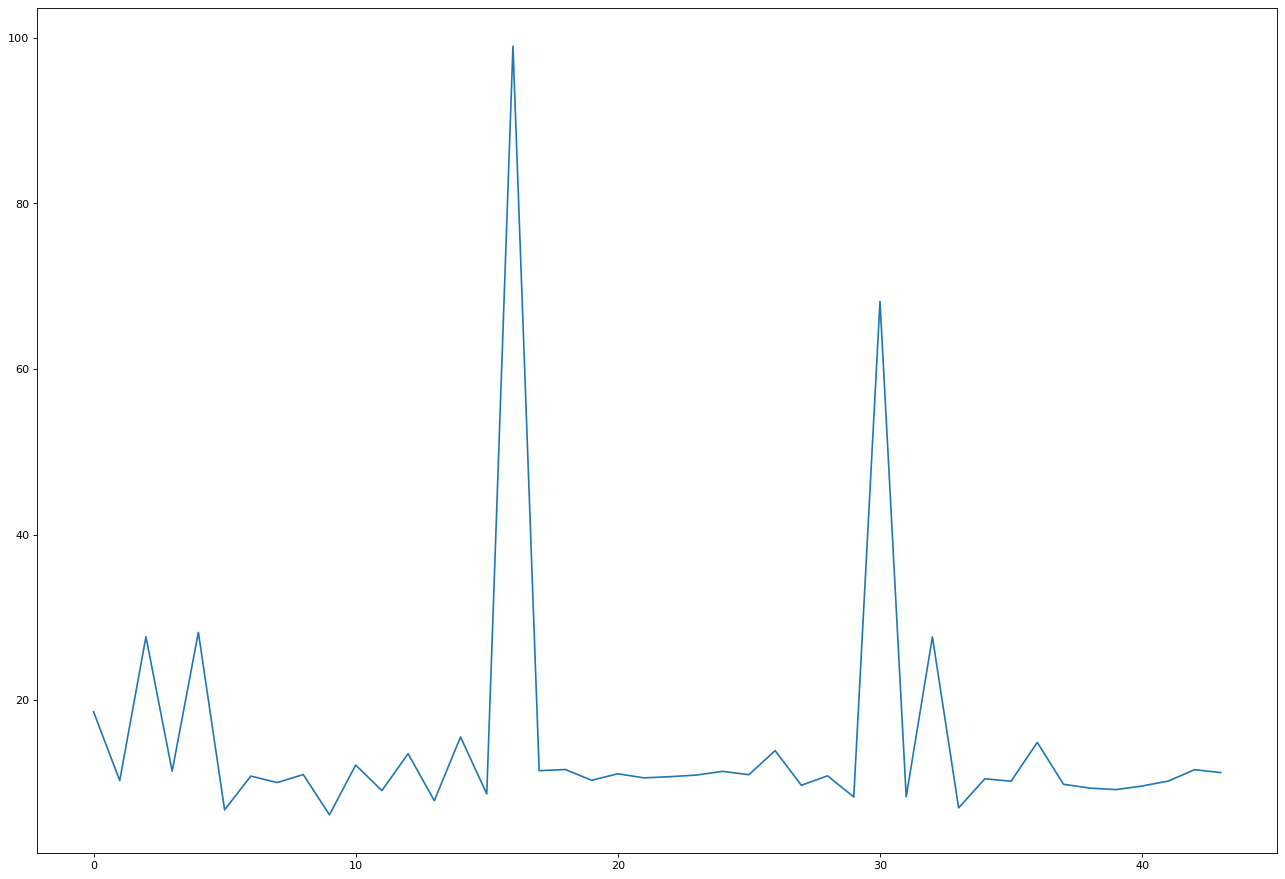

In [205]:
from matplotlib.pyplot import figure

figure(figsize=(20, 14), dpi=80)
data_1['hr_step_ratio'].plot()

In [212]:
data_1.head()

,datetime,heartrate,steps,hr_step_ratio
0,2026-06-22 00:00:00,71.182364,3.826389,18.603013
1,2026-06-22 12:00:00,89.032760,8.665278,10.274657
2,2026-06-23 00:00:00,69.057061,2.497222,27.653550
3,2026-06-23 12:00:00,77.727771,6.812500,11.409581
4,2026-06-24 00:00:00,68.116627,2.416667,28.186190


# Dataset_1_creation

In [315]:
symptoms_date = '2026-07-14'
sub = '0001-01-05'

data = pd.read_csv("/home/anwer/Desktop/code_makethon/merged_data_dataset_1/AOB9SON.csv")
data.head()

,datetime,heartrate,steps
0,2026-05-20,86.223242,5.388194
1,2026-05-21,72.023088,1.959722
2,2026-05-22,80.410441,3.824306
3,2026-05-23,77.299645,2.847222
4,2026-05-24,76.046096,2.267361


In [316]:
data.head()

,datetime,heartrate,steps
0,2026-05-20,86.223242,5.388194
1,2026-05-21,72.023088,1.959722
2,2026-05-22,80.410441,3.824306
3,2026-05-23,77.299645,2.847222
4,2026-05-24,76.046096,2.267361


In [317]:
from datetime import datetime
def __datetime(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

In [318]:
symptoms_date = __datetime(symptoms_date)

In [319]:
from datetime import datetime, timedelta
days_15 = timedelta(15)
symptoms_date

datetime.datetime(2026, 7, 14, 0, 0)

In [320]:
def data_mask(data,start_date = '2026-07-01',end_date ='2026-07-30'):

    mask = (data['datetime'] > start_date) & (data['datetime'] <= end_date)
    return data.loc[mask]

In [410]:

def dataset_create(data,symptoms_date):
    col_name = [f"hr_{i}" for i in range(10)]+[f"steps_{i}" for i in range(10)]
    dataset = pd.DataFrame(columns=col_name)
    for i in range(0,11):
        
        
        start_date= symptoms_date  - days_15 + timedelta(i)
        end_date = start_date + timedelta(10)
        start_date = str(start_date).split(" ")[0]
        end_date = str(end_date).split(" ")[0]
        
        
        
        data_1 = data_mask(data,start_date,end_date)
        
        
        l = []
        for i in data_1.iterrows():
            l.append(i[1].heartrate)
        for i in data_1.iterrows():
            l.append(i[1].steps)
        try:
            a_series = pd.Series(l, index = dataset.columns)
            dataset = dataset.append(a_series, ignore_index=True)

        except:
            continue
    
    return dataset
    
    
    

    

In [411]:
df_sheet_name = pd.read_excel('41551_2020_640_MOESM3_ESM.xlsx', sheet_name='SuppTable3_Fig2a_COVID-19',skiprows=3)

In [412]:
dct = {}
for i in df_sheet_name.iterrows():
    try:
        dct[i[1].ParticipantID] = i[1].Symptom_dates.split(" ")[0].split("'")[1]
        
       
    except:
        continue

In [ ]:
col_name = [f"hr_{i}" for i in range(10)]+[f"steps_{i}" for i in range(10)]
dataset = pd.DataFrame(columns=col_name)
for i,j in dct.items():
    try:
        data = pd.read_csv("merged_data_dataset_1/"+i+".csv")
        
        j = __datetime(j)
        print(j)
        
        dataset = dataset.append(dataset_create(data,j),ignore_index=True)
    except:
        continue
    

In [426]:
print(dataset.shape)
dataset['label'] = 1

(338, 20)


In [427]:
dataset.head()

,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,...,steps_1,steps_2,steps_3,steps_4,steps_5,steps_6,steps_7,steps_8,steps_9,label
0,79.244483,82.695395,79.039354,84.182074,80.23207,83.304476,84.694989,80.915971,83.903795,80.381839,...,4.397222,3.023611,4.523611,2.826389,5.363889,5.382639,4.747917,7.506944,4.551389,1
1,82.695395,79.039354,84.182074,80.23207,83.304476,84.694989,80.915971,83.903795,80.381839,75.276346,...,3.023611,4.523611,2.826389,5.363889,5.382639,4.747917,7.506944,4.551389,2.770833,1
2,79.039354,84.182074,80.23207,83.304476,84.694989,80.915971,83.903795,80.381839,75.276346,82.216731,...,4.523611,2.826389,5.363889,5.382639,4.747917,7.506944,4.551389,2.770833,4.790278,1
3,84.182074,80.23207,83.304476,84.694989,80.915971,83.903795,80.381839,75.276346,82.216731,85.587514,...,2.826389,5.363889,5.382639,4.747917,7.506944,4.551389,2.770833,4.790278,6.250694,1
4,80.23207,83.304476,84.694989,80.915971,83.903795,80.381839,75.276346,82.216731,85.587514,84.599589,...,5.363889,5.382639,4.747917,7.506944,4.551389,2.770833,4.790278,6.250694,4.236111,1


In [428]:
col_name = [f"hr_{i}" for i in range(10)]+[f"steps_{i}" for i in range(10)]
dataset_neg = pd.DataFrame(columns=col_name)
for i,j in dct.items():
    try:
        data = pd.read_csv("merged_data_dataset_1/"+i+".csv")
        
        j = __datetime(j)-timedelta(10)
        print(j)
        
        dataset_neg = dataset.append(dataset_create(data,j),ignore_index=True)
    except:
        continue

2026-07-04 00:00:00
2023-05-12 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is de

2028-06-07 00:00:00
2023-11-26 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is de

2023-08-19 00:00:00
2027-04-01 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is de

2027-02-22 00:00:00
2027-07-08 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is de

2023-08-25 00:00:00
2024-11-13 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is de

2024-01-29 00:00:00
2028-03-03 00:00:00
2025-02-20 00:00:00


/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_neg = dataset.append(dataset_create(data,j),ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a_series = pd.Series(l, index = dataset.columns)
/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_neg = dataset.append(dataset_create(data,j),ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/22476

2028-01-06 00:00:00
2025-08-24 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is de

2024-07-30 00:00:00
2023-03-20 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is de

2025-01-06 00:00:00
2028-01-11 00:00:00


/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_neg = dataset.append(dataset_create(data,j),ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a_series = pd.Series(l, index = dataset.columns)
/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_neg = dataset.append(dataset_create(data,j),ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/22476

2023-12-16 00:00:00
2024-08-04 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_neg = dataset.append(dataset_create(data,j),ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.ap

2024-02-25 00:00:00
2023-10-03 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is de

2024-07-19 00:00:00
2026-01-26 00:00:00
2023-03-28 00:00:00


/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_neg = dataset.append(dataset_create(data,j),ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a_series = pd.Series(l, index = dataset.columns)
/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_neg = dataset.append(dataset_create(data,j),ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/22476

2023-05-08 00:00:00
2025-06-27 00:00:00
2024-12-27 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is de

2023-10-28 00:00:00
2024-08-26 00:00:00


/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_neg = dataset.append(dataset_create(data,j),ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.ap

2027-05-30 00:00:00
2027-07-27 00:00:00
2025-04-02 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_neg = dataset.append(dataset_create(data,j),ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a_series = pd.Series(l, index = dataset.columns)
/tmp/ipykernel_177411/1649536841.py:10: Futu

2026-08-14 00:00:00
2029-01-01 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is de

2028-08-09 00:00:00
2024-09-21 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is de

2027-01-07 00:00:00


/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/2247669968.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(a_series, ignore_index=True)
/tmp/ipykernel_177411/1649536841.py:10: FutureWarning: The frame.append method is de

In [430]:
dataset_neg

,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,...,steps_1,steps_2,steps_3,steps_4,steps_5,steps_6,steps_7,steps_8,steps_9,label
0,79.244483,82.695395,79.039354,84.182074,80.23207,83.304476,84.694989,80.915971,83.903795,80.381839,...,4.397222,3.023611,4.523611,2.826389,5.363889,5.382639,4.747917,7.506944,4.551389,1.0
1,82.695395,79.039354,84.182074,80.23207,83.304476,84.694989,80.915971,83.903795,80.381839,75.276346,...,3.023611,4.523611,2.826389,5.363889,5.382639,4.747917,7.506944,4.551389,2.770833,1.0
2,79.039354,84.182074,80.23207,83.304476,84.694989,80.915971,83.903795,80.381839,75.276346,82.216731,...,4.523611,2.826389,5.363889,5.382639,4.747917,7.506944,4.551389,2.770833,4.790278,1.0
3,84.182074,80.23207,83.304476,84.694989,80.915971,83.903795,80.381839,75.276346,82.216731,85.587514,...,2.826389,5.363889,5.382639,4.747917,7.506944,4.551389,2.770833,4.790278,6.250694,1.0
4,80.23207,83.304476,84.694989,80.915971,83.903795,80.381839,75.276346,82.216731,85.587514,84.599589,...,5.363889,5.382639,4.747917,7.506944,4.551389,2.770833,4.790278,6.250694,4.236111,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,73.032955,71.310116,100.615385,74.558951,79.906817,73.967946,62.213447,78.304391,72.36551,69.972515,...,0.73125,0.134028,1.2375,1.707639,1.310145,0.278472,0.0,0.0,0.0,1.0
338,75.294032,70.224642,68.056616,71.537835,74.259268,70.09775,70.89982,68.773206,66.883585,70.610166,...,0.638194,0.643056,1.395833,1.936111,0.738889,0.113889,0.236111,0.485417,0.549306,NaN
339,70.224642,68.056616,71.537835,74.259268,70.09775,70.89982,68.773206,66.883585,70.610166,73.642595,...,0.643056,1.395833,1.936111,0.738889,0.113889,0.236111,0.485417,0.549306,0.925,NaN
340,68.056616,71.537835,74.259268,70.09775,70.89982,68.773206,66.883585,70.610166,73.642595,70.027014,...,1.395833,1.936111,0.738889,0.113889,0.236111,0.485417,0.549306,0.925,1.3625,NaN


In [436]:
dataset_neg_pos = dataset_neg.replace(np.nan,0)

In [438]:
dataset_neg_pos.to_csv("dataset_1_balanced.csv")